In [10]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import scipy
plt.rcParams['figure.dpi'] = 110

eps_0 =  8.472096409885063e-12 +_ 3.375263185476708e-13
popt =  0.00014388972458165842 5.732532618280761e-06


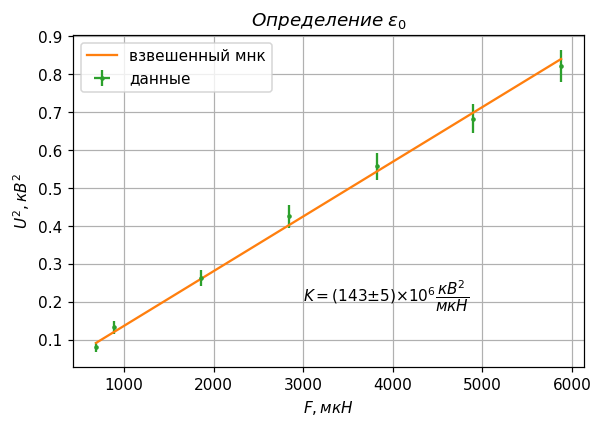

In [11]:
def line(arr, a, b):
    return a * arr + b

#U_2 = np.array([360, 440, 460, 580, 680, 760, 870, 970], dtype=np.float64)
#F_1 = np.array([70, 90, 100, 150, 200, 250, 300, 350], dtype=np.float64)
#plt.plot(F_1, U_2**2/ 1e6, 'o')

#constants
S = 42 * 1e-4 #m^2
d = 0.16 * 1e-2 #m

U = np.array([0]*7, dtype=np.float64) #Volts
F = np.array([70, 90, 190, 290, 390, 500, 600], dtype=np.float64) #mg
F *= 9.8 #F -- muNewtons

data_U = [[280,280,300], [360,360,380], [520,510,510], [640,660,660], [740,740,760], [840,820,820], [900,900,920]] #Volts

for i in range(len(U)):
    U[i] = np.average(data_U[i])
    
#errors
error_U_2 = np.array([0.0] * 7, dtype=np.float64)
for i in range(len(error_U_2)):
    error_U_2[i] = np.sqrt(np.std(data_U[i], ddof=1)**2 + 400)
error_U_2 *= 2
for i in range(len(error_U_2)):
    error_U_2[i] *= U[i]

U = U**2
U /= 1e6 
error_U_2 /= 1e6

plt.plot(F, U, 'o', markersize=0)
plt.grid()
plt.xlabel(r'$F, мкН$')
popt, pcov = curve_fit(line, F, U, sigma=error_U_2, absolute_sigma=True)
plt.plot(F, line(F, *popt), label='взвешенный мнк')
plt.ylabel(r'$U^2, кB^2$')
plt.errorbar(F, U, xerr=0, yerr=error_U_2, fmt='o', markersize=2, label='данные')


eps_0 = 2 * d**2 / (S * popt[0]) * 1e-12
sigma_eps_0 = eps_0 * np.sqrt(pcov[0][0]) / popt[0]
print('eps_0 = ', eps_0, '+_', sigma_eps_0)

plt.legend()
plt.title(r'$Определение\; \epsilon_0$')
plt.text(3000, 0.2, r'$K = ($' + str(int(popt[0]*1e6)) +r'$\pm$'+str(int(np.sqrt(pcov[0][0])*1e6)) +r')$\times 10^6 \dfrac{кВ^2}{мкН}$')
print('popt = ', popt[0], np.sqrt(pcov[0][0]))
plt.savefig('epsilon_0.png')
plt.show()

A =  0.0032614236367773434 +_ 0.00013122708106354784


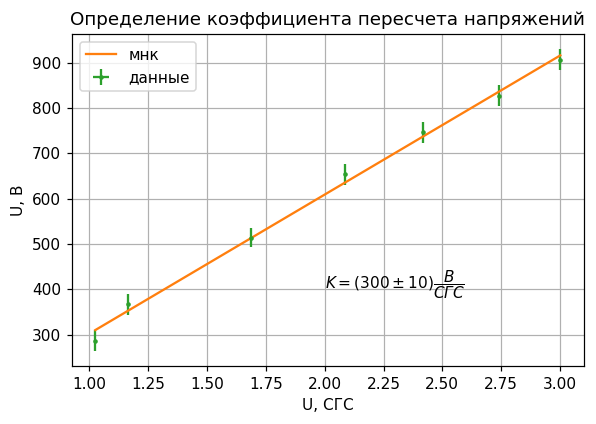

In [12]:
#second plot
U_cgs = 2*(d*100)*np.sqrt(2*np.pi * (F*1e5/1e6)/(S*1e4)) #CGS

for i in range(len(U)):
    U[i] = np.average(data_U[i])

for i in range(len(error_U_2)):
    error_U_2[i] = np.sqrt(np.std(data_U[i], ddof=1)**2 + 400)

#plot
plt.plot(U_cgs, U, 'o', markersize=0)
#curve fit
popt, pcov = curve_fit(line, U_cgs, U, sigma=error_U_2, absolute_sigma=True)
plt.plot(U_cgs, line(U_cgs, *popt), label='мнк')
#errorbar
plt.errorbar(U_cgs, U, xerr=0, yerr=error_U_2, fmt='o', markersize=2, label='данные')

print('A = ', 1/popt[0], '+_', np.sqrt(pcov[0][0])/popt[0]**2)



plt.grid()
plt.legend()
plt.xlabel('U, СГС')
plt.ylabel('U, В')
plt.title('Определение коэффициента пересчета напряжений')
plt.text(2.0, 400, r'$K = ($'+r'$300\pm 10)\dfrac{В}{СГС}$' )
plt.savefig('volts_cgs.png')
plt.show()